# Nettoyage des Données de la Consommation, Contribution et Production Halieutique au Maroc


## Introduction

Ce notebook a pour objectif de nettoyer et d'analyser trois ensembles de données relatifs à la consommation de poisson, la contribution nutritionnelle du poisson et la production halieutique nationale au Maroc. Les données couvrent différentes périodes et sont cruciales pour comprendre l'évolution de ces aspects au fil des années. Le nettoyage des données est une étape essentielle pour garantir l'exactitude et la qualité des analyses ultérieures.

### NB : Il est nécessaire d'importer les fichiers de données bruts (`consommation.csv`, `contribution.csv`, et `production.csv`) dans le répertoire du notebook avant d'exécuter ce notebook.



## Importation des Bibliothèques Nécessaires


In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt

## Nettoyage des Données de Consommation

Le fichier `consommation.csv` contient les données de consommation de poisson au Maroc en kg/habitant/an. Nous allons nettoyer ce fichier en remplaçant les virgules par des points, les points-virgules par des virgules, et en ajustant les données pour assurer leur cohérence. De plus, nous allons supprimer les années dupliquées pour conserver uniquement la première occurrence de chaque année.


In [3]:
# Lire le contenu du fichier CSV
with open('/content/consommation.csv', 'r') as file:
    data = file.read()

# Remplacer les virgules par des points et les points-virgules par des virgules
data = data.replace(',', '.').replace(';', ',')

# Créer un DataFrame à partir des données modifiées
df = pd.read_csv(io.StringIO(data))

# Sauvegarder les données corrigées dans un nouveau fichier CSV
df.to_csv('corrected_consommation.csv', index=False)

# Lire le nouveau fichier CSV
df_corrected = pd.read_csv('corrected_consommation.csv')

# Nettoyer les données
# Supprimer les chiffres après la virgule dans les années
df_corrected['Année'] = df_corrected['Année'].astype(str).str.split('.').str[0].astype(int)

# Conserver deux chiffres après la virgule dans la consommation
df_corrected['Consommation'] = df_corrected['Consommation'].round(2)

# Éliminer les lignes des années dupliquées en gardant la première occurrence
df_cleaned = df_corrected.drop_duplicates(subset=['Année'])

# Sauvegarder les données nettoyées dans un fichier CSV
df_cleaned.to_csv('cleaned_consommation.csv', index=False)

### Afficher les premières lignes des données nettoyées

In [4]:
# Afficher toutes les lignes des données nettoyées
print(df_cleaned.to_string(index=False))

 Année  Consommation
  1990          7.62
  1991          7.21
  1992          8.93
  1993          7.82
  1994          8.93
  1995          7.62
  1996          6.41
  1997          7.11
  1998          6.91
  1999          7.72
  2000          7.92
  2001          8.32
  2002          9.53
  2003         10.44
  2004         10.64
  2005         12.65
  2006         11.95
  2007         11.54
  2008         11.44
  2009         13.56
  2010         13.56
  2011         13.36
  2012         12.55
  2013         12.35
  2019         13.60
  2020         13.67


### Tracer le graphe des données nettoyées

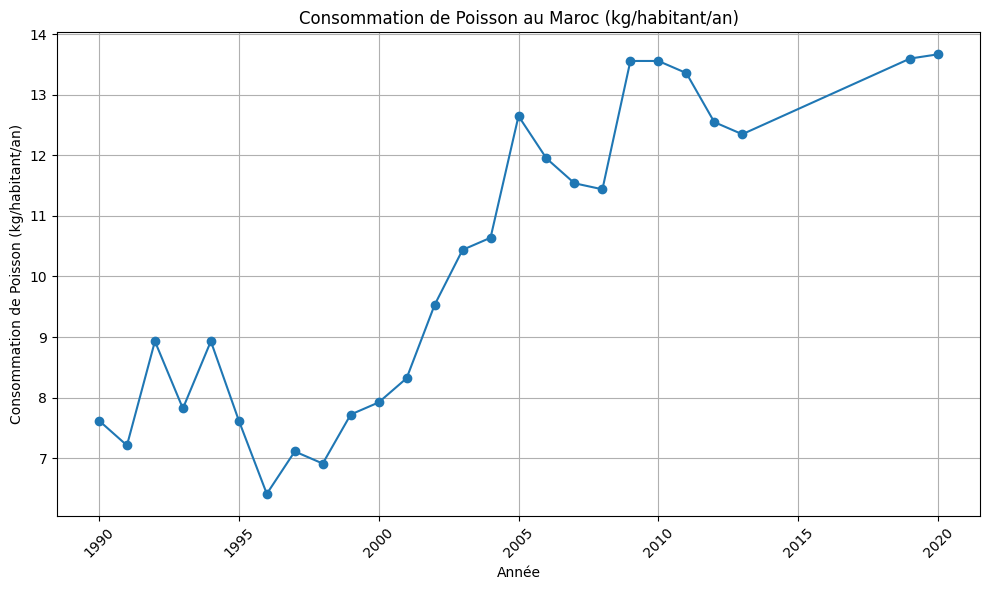

In [5]:
# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Année'], df_cleaned['Consommation'], marker='o')
plt.xlabel('Année')
plt.ylabel('Consommation de Poisson (kg/habitant/an)')
plt.title('Consommation de Poisson au Maroc (kg/habitant/an)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Nettoyage des Données de Contribution Nutritionnelle du poisson

Le fichier contribution.csv contient les données de pourcentage de contribution nutritionnelle du poisson par rapport aux sources nutritionnelles animales. Nous allons nettoyer ce fichier en suivant les mêmes étapes que pour le fichier de consommation.

In [6]:
# Lire le contenu du fichier CSV
with open('/content/contribution.csv', 'r') as file:
    data = file.read()

# Remplacer les virgules par des points et les points-virgules par des virgules
data = data.replace(',', '.').replace(';', ',')

# Créer un DataFrame à partir des données modifiées
df = pd.read_csv(io.StringIO(data))

# Sauvegarder les données corrigées dans un nouveau fichier CSV
df.to_csv('corrected_contribution.csv', index=False)

# Lire le nouveau fichier CSV
df_corrected = pd.read_csv('corrected_contribution.csv')

# Nettoyer les données
# Supprimer les chiffres après la virgule dans les années
df_corrected['Année'] = df_corrected['Année'].astype(str).str.split('.').str[0]

# Conserver deux chiffres après la virgule dans les pourcentages
df_corrected['Pourcentage'] = df_corrected['Pourcentage'].round(2)

# Éliminer les lignes des années dupliquées en gardant la première occurrence
df_cleaned = df_corrected.drop_duplicates(subset=['Année'])

# Sauvegarder les données nettoyées dans un fichier CSV
df_cleaned.to_csv('cleaned_contribution.csv', index=False)






### Afficher les premières lignes des données nettoyées

In [7]:
print(df_cleaned.to_string(index=False))

Année  Pourcentage
 1980        23.72
 1981        22.63
 1982        22.33
 1983        23.36
 1984        23.89
 1985        27.35
 1986        24.50
 1987        19.48
 1988        15.03
 1989        14.75
 1990        15.23
 1991        16.30
 1992        17.54
 1993        17.57
 1994        18.12
 1995        15.03
 1996        13.95
 1997        13.67
 1998        14.62
 1999        14.93
 2000        15.97
 2001        16.43
 2002        17.34
 2003        18.89
 2004        19.67
 2005        19.90
 2006        19.35
 2007        17.95
 2008        18.30
 2009        18.69
 2010        17.51
 2011        17.32


### Tracer le graphe des données nettoyées





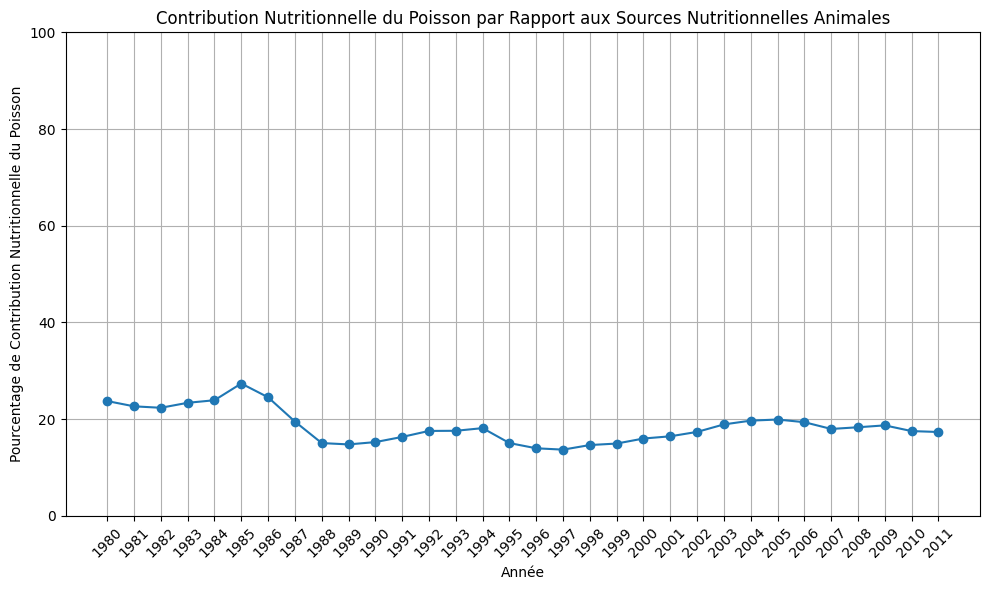

In [8]:
# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Année'], df_cleaned['Pourcentage'], marker='o')
plt.xlabel('Année')
plt.ylabel('Pourcentage de Contribution Nutritionnelle du Poisson')
plt.title('Contribution Nutritionnelle du Poisson par Rapport aux Sources Nutritionnelles Animales')
plt.grid(True)
plt.ylim(0, 100)  # Définir les limites de l'axe y pour afficher les pourcentages jusqu'à 100%

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Nettoyage des Données de Production Halieutique

Le fichier production.csv contient les données de l'évolution de la production halieutique nationale de 1980 à 2015 en millions de DH. Nous allons nettoyer ce fichier en suivant les mêmes étapes que pour les fichiers précédents.

In [9]:
# Lire le contenu du fichier CSV
with open('/content/production.csv', 'r') as file:
    data = file.read()

# Remplacer les virgules par des points et les points-virgules par des virgules
data = data.replace(',', '.').replace(';', ',')

# Créer un DataFrame à partir des données modifiées
df = pd.read_csv(io.StringIO(data))

# Sauvegarder les données corrigées dans un nouveau fichier CSV
df.to_csv('corrected_production.csv', index=False)

# Lire le nouveau fichier CSV
df_corrected = pd.read_csv('corrected_production.csv')

# Nettoyer les données
# Supprimer les chiffres après la virgule dans les années
df_corrected['Année'] = df_corrected['Année'].astype(str).str.split('.').str[0].astype(int)

# Conserver deux chiffres après la virgule dans la production
df_corrected['Production'] = df_corrected['Production'].round(2)

# Éliminer les lignes des années dupliquées en gardant la première occurrence
df_cleaned = df_corrected.drop_duplicates(subset=['Année'])

# Sauvegarder les données nettoyées dans un fichier CSV
df_cleaned.to_csv('cleaned_production.csv', index=False)





### Afficher toutes les lignes des données nettoyées

In [10]:
print(df_cleaned.to_string(index=False))

 Année  Production
  1980     4976.83
  1981     4234.21
  1982     3885.81
  1983     3596.74
  1984     3221.81
  1985     3288.62
  1986     3204.70
  1987     3345.88
  1988     3121.45
  1989     3343.64
  1990     3231.23
  1991     3207.01
  1992     3385.99
  1993     3014.06
  1994     3089.92
  1995     3007.06
  1996     3134.66
  1997     3566.41
  1998     3477.53
  1999     3628.91
  2000     3080.41
  2001     3355.33
  2002     5261.14
  2003     5801.95
  2004     6093.35
  2005     4743.24
  2006     5043.06
  2007     5165.99
  2008     4864.45
  2009     5314.87
  2010     5514.32
  2012     5455.09
  2013     5056.25
  2014     5074.94
  2015     4857.47



### Tracer le graphe des données nettoyées




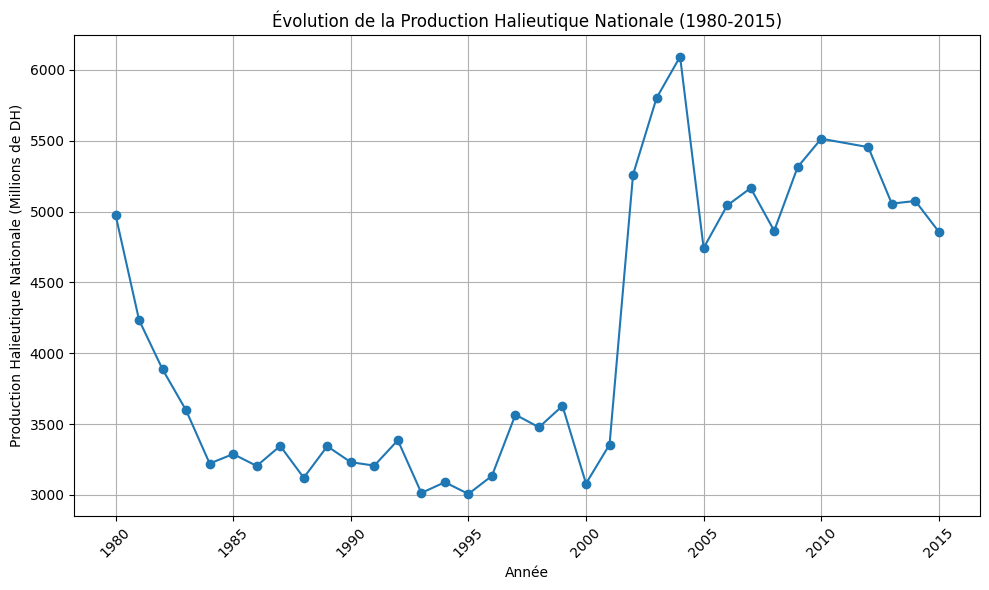

In [11]:
# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Année'], df_cleaned['Production'], marker='o')
plt.xlabel('Année')
plt.ylabel('Production Halieutique Nationale (Millions de DH)')
plt.title('Évolution de la Production Halieutique Nationale (1980-2015)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Génération de Fichiers Nettoyés
Le notebook génère des fichiers CSV nettoyés cleaned_consommation.csv, cleaned_contribution.csv, et cleaned_production.csv qui contiennent les données nettoyées. Ces fichiers peuvent être utilisés dans des modèles de prévision (forecasting) pour prédire la demande future sur les produits halieutiques dans le marché interne du Maroc. En utilisant ces données nettoyées, les modèles de prédiction seront plus précis et fiables, permettant ainsi de mieux comprendre les tendances et d'anticiper les besoins futurs.

# Conclusion

Ce notebook a permis de nettoyer et d'analyser trois ensembles de données importantes concernant la consommation, la contribution nutritionnelle et la production halieutique au Maroc. Le nettoyage des données a assuré l'exactitude des informations, facilitant ainsi une analyse plus fiable et des visualisations pertinentes pour comprendre les tendances et les évolutions au fil des années. Ces données nettoyées vont également nous aider à bien utiliser les modèles de prédiction pour prédire la demande sur les produits halieutiques dans le marché interne du Maroc.
